In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import ImageDataGenerator


In [20]:
train1 = pd.read_csv("C:/Users/gokay/OneDrive/Masaüstü/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5.1/1) CNN Review/mnist/mnist_train.csv")
print(train1.shape)
train1.head()


(59999, 785)


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test1 = pd.read_csv("C:/Users/gokay/OneDrive/Masaüstü/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5.1/1) CNN Review/mnist/mnist_test.csv")
print(test1.shape)
test1.head()



(9999, 785)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train = "C:/Users/gokay/OneDrive/Masaüstü/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5.1/1) CNN Review/mnist/mnist_train.csv"
test = "C:/Users/gokay/OneDrive/Masaüstü/DerinOgrenme_1/DerinOgrenme_Dersler/Derin Ogrenme 5.1/1) CNN Review/mnist/mnist_test.csv"


In [23]:
def datayükleme(datam):
    data=pd.read_csv(datam)
    data=data.to_numpy()
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y=to_categorical(y,num_classes=len(set(y)))
    return x,y

x_train,y_train = datayükleme(train)
x_test,y_test=datayükleme(test)

In [24]:
print(x_train.shape)


(59999, 28, 28, 1)


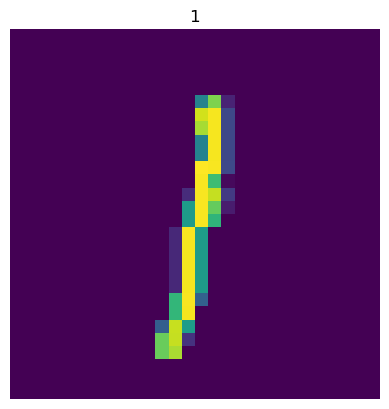

In [25]:
index = 123
vis = x_train.reshape(59999,28,28)
plt.imshow(vis[index,:,:])
plt.title(np.argmax(y_train[index]))
plt.axis("off")
plt.show()


In [26]:
numberOfClass = y_train.shape[1]

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])



In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # veri seti üzerinde giriş ortalamasını 0'a ayarla
        samplewise_center=False,  # her örneğin ortalamasını 0'a ayarla
        featurewise_std_normalization=False,  # veri setinin std ile girişleri böl
        samplewise_std_normalization=False,  # her bir girişi kendi std ile böl
        zca_whitening=False,  # boyut azaltma işlemi
        rotation_range=5,  # görüntüleri rastgele 5 derece döndür
        zoom_range = 0.1, # rastgele görüntüleri %5 zoomla
        width_shift_range=0.1,  # görüntüleri yatayda rastgele %5 kaydır
        height_shift_range=0.1,  # görüntüleri dikeyde rastgele %5 kaydır
        horizontal_flip=False,  # görüntüleri yatayda rastgele çevir
        vertical_flip=False)  # görüntüleri dikeyde rastgele çevirme

datagen.fit(x_train)



# Train
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs= 25, batch_size= 4000)

#%%
model.save_weights('cnn_mnist_model.h5')  # always save your weights after training or during training
#%% evaluation 



Epoch 1/25
15/15 [==============================] - 7s 453ms/step - loss: 0.0235 - accuracy: 0.9937 - val_loss: 4.4001 - val_accuracy: 0.1135
Epoch 2/25
15/15 [==============================] - 7s 452ms/step - loss: 0.0211 - accuracy: 0.9944 - val_loss: 4.3236 - val_accuracy: 0.1135
Epoch 3/25
15/15 [==============================] - 7s 453ms/step - loss: 0.0179 - accuracy: 0.9956 - val_loss: 4.3487 - val_accuracy: 0.1135
Epoch 4/25
15/15 [==============================] - 7s 458ms/step - loss: 0.0161 - accuracy: 0.9961 - val_loss: 4.3500 - val_accuracy: 0.1135
Epoch 5/25
15/15 [==============================] - 7s 441ms/step - loss: 0.0144 - accuracy: 0.9967 - val_loss: 4.3130 - val_accuracy: 0.1135
Epoch 6/25
15/15 [==============================] - 7s 456ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 4.2005 - val_accuracy: 0.1135
Epoch 7/25
15/15 [==============================] - 7s 441ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 3.9463 - val_accuracy: 0.1139
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


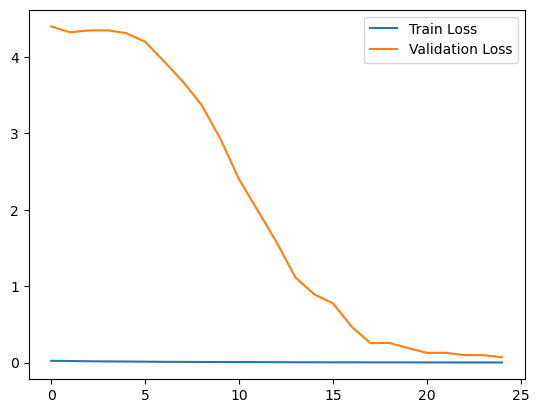

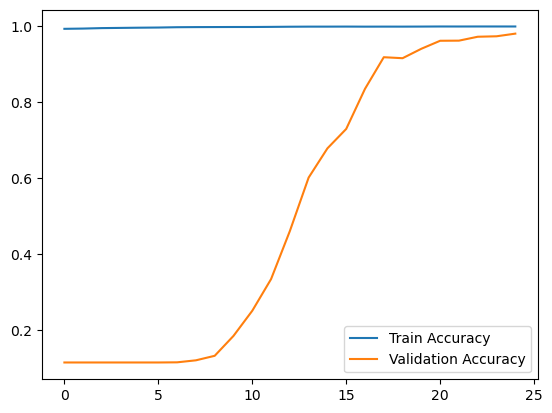

In [29]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()


In [30]:
score = model.evaluate(x_test,y_test,verbose = 0)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

Test Loss :  0.0711803063750267
Test Accuracy :  0.9809980988502502


In [31]:
score = model.evaluate(x_train,y_train,verbose = 0)
print("Train Loss : ",score[0])
print("Train Accuracy : ",score[1])

Train Loss :  0.012137816287577152
Train Accuracy :  0.9965665936470032


1/1 [==============================] - 0s 13ms/step
Tahmin Edilen Sınıf: 9
Gerçek Sınıf: 9


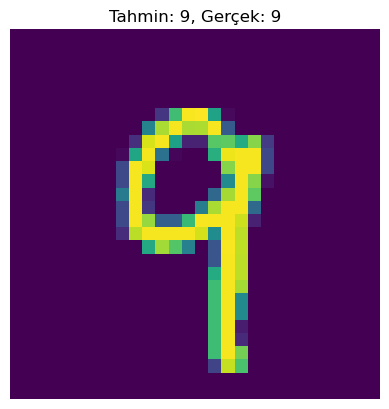

In [41]:
#  X_val'dan bir örnek seçin ile tahmin
import random

index = random.randint(0, x_test.shape[0] - 1) 
resim = x_test[index]  # X_val içindeki bir örnek


resimboyut = resim.reshape(-1, 28, 28, 1)  # Modelin girdi formatına uygun hale getirin
tahmin = hist.model.predict(resimboyut)
sınıf = np.argmax(tahmin)  # En yüksek olasılığa sahip sınıfı alma

#  Orijinal etiketle karşılaştıma
gerçek = np.argmax(y_test[index])  # Y_val içindeki  etiket

#  Sonuçları yazdırın
print(f"Tahmin Edilen Sınıf: {sınıf}")
print(f"Gerçek Sınıf: {gerçek}")

#  Görüntüyü görselleştirin
plt.imshow(resim[:, :, 0])  
plt.title(f"Tahmin: {sınıf}, Gerçek: {gerçek}")
plt.axis("off")
plt.show()